Aqui irá algo teorico

In [3]:
import pandas as pd
dfOriginal = pd.read_csv('../baseDatos/00OnlineRetail.csv', encoding='latin1')
dfOriginal.head()
#A pesar que que el archivo tuviera un encoding UTF-8 fue necesario colocar el encoding latin1 para que no diera error al leer el archivo.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df= dfOriginal.copy()
#Realizamos una copia para no modificar el original
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()
#Nos da ingreso de datos, tipo de datos, cantidad de datos no nulos y uso de memoria
#Aqui tenemos un problema porque vemos que invoice tiene mas entradas que todos los demás campos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [6]:
df.isna().sum()
#Nos da la cantidad de datos nulos por cada columna
#Existen muchos nulos especialmente en la columna de CustomerID, que es la que nos interesa para el análisis de clientes.

InvoiceNo           0
StockCode        6035
Description      7489
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
CustomerID     138727
Country          6035
dtype: int64

Vamos borrar todas las observaciones que tienen algun valor en blanco. Esto es especialmente importante para Customer ID dado que estamos haciendo un analisis de clientes y sin que podamos identificarlos el exercicio no hace sentido.

In [7]:
df.dropna(inplace=True) #Eliminamos los nulos de todo el dataframe, elimina en el propio dataframe ya que usamos inplace=True

In [8]:
df.isna().sum() #como es visible ya no existen valores nulos en el DataFrame
df.info() #tenemos ahora 403182 observaciones

<class 'pandas.core.frame.DataFrame'>
Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    403182 non-null  object 
 1   StockCode    403182 non-null  object 
 2   Description  403182 non-null  object 
 3   Quantity     403182 non-null  float64
 4   InvoiceDate  403182 non-null  object 
 5   UnitPrice    403182 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      403182 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.7+ MB


In [9]:
df.shape #Tenemos 403182 filas y 8 columnas
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #Convertimos la columna InvoiceDate a tipo datetime para poder trabajar con fechas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    403182 non-null  object        
 1   StockCode    403182 non-null  object        
 2   Description  403182 non-null  object        
 3   Quantity     403182 non-null  float64       
 4   InvoiceDate  403182 non-null  datetime64[ns]
 5   UnitPrice    403182 non-null  float64       
 6   CustomerID   403182 non-null  float64       
 7   Country      403182 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 27.7+ MB


Existen duplicados? 
df.duplicated().sum() - ?Cuantos duplicados existen?
df[df.duplicated()].head()  - Ver los primeros duplicados
df = df.drop_duplicates() - Borrar Duplicados

In [10]:
df.duplicated().sum() #Tenemos 5179 duplicados
df[df.duplicated()].head() #Vemos algunos duplicados, como la lista es tan pequeña aqui no da para verlos pero en realidad existen por ejemplo linea 496 y 519 del archivo original
df = df.drop_duplicates() #Eliminamos los duplicados

In [11]:
df.duplicated().sum() #Ya no tendremos duplicados, ya que se han borrado los 5179 duplicados
df.shape #Ahora tenemos 398003 filas y 8 columnas

(398003, 8)

In [12]:
df.describe().T #Existen valores que son negativos que corresponden a devoluciones las cuales debemos eliminar 

,count,mean,min,25%,50%,75%,max,std
Quantity,398003.0,12.158469,-74215.0,2.0,5.0,12.0,74215.0,173.844024
InvoiceDate,398003,2011-07-10 16:44:00.204722176,2010-12-01 08:26:00,2011-04-07 10:24:00,2011-07-31 11:45:00,2011-10-20 12:07:00,2011-12-09 12:50:00,NaN
UnitPrice,398003.0,3.489083,0.0,1.25,1.95,3.75,38970.0,70.078336
CustomerID,398003.0,15281.191448,12346.0,13936.5,15146.0,16786.0,18287.0,1714.430925


In [13]:
df = df[df['Quantity'] > 0] #Eliminamos las devoluciones, ya que no nos interesan para el análisis de clientes

Calculmos una columna Total para facilitar nuestro analisis.

In [14]:
df['Total']=df['Quantity'] * df['UnitPrice'] #Creamos una nueva columna Total que es el resultado de multiplicar la cantidad por el precio unitario

Calculando las metricas de RFM

In [28]:
import datetime as dt

#Recency
latest_date = df['InvoiceDate'].max() + dt.timedelta(days = 1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'
}).reset_index()

rfm.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'Monetary'
}, inplace = True)

rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
rfm["rfm_segment"] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [29]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,1,77183.60,1,1,11
1,12347.0,2,181,4299.80,5,5,55
2,12348.0,75,31,1797.24,2,3,23
3,12349.0,19,73,1757.55,4,4,44
4,12350.0,310,17,334.40,1,2,12
...,...,...,...,...,...,...,...
4332,18280.0,278,10,180.60,1,1,11
4333,18281.0,181,7,80.82,1,1,11
4334,18282.0,8,12,178.05,5,1,51
4335,18283.0,4,721,2045.53,5,5,55


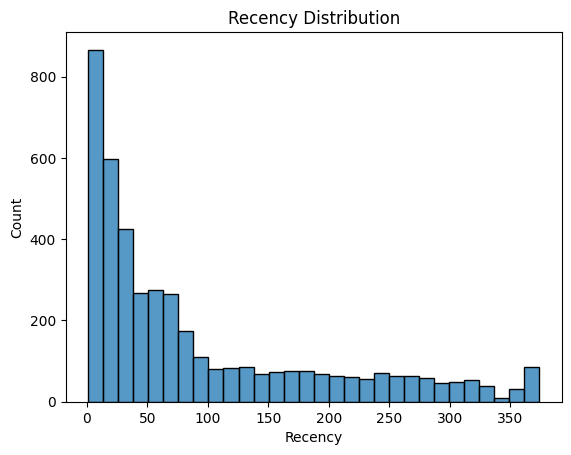

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#Elimina avisos de advertencia de pandas y seaborn
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Distribucion de Recency
sns.histplot(data = rfm, x = 'Recency', bins = 30)
plt.title('Recency Distribution')
plt.show()

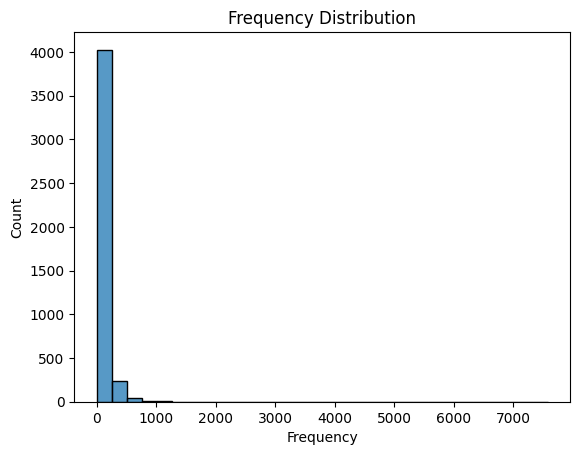

In [31]:
# Distribucion de Frequency
sns.histplot(data = rfm, x = 'Frequency', bins = 30)
plt.title('Frequency Distribution')
plt.show()

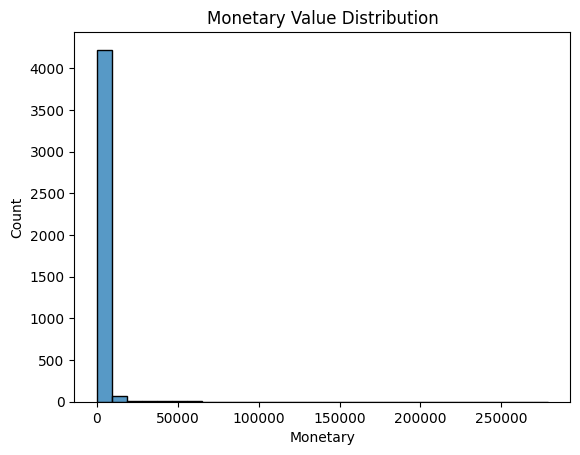

In [32]:
# Distribucion de Monetary Value
sns.histplot(data = rfm, x = 'Monetary', bins = 30)
plt.title('Monetary Value Distribution')
plt.show()

Pasamos ahora a calcular la segmentacion RFM

In [33]:
#Mapeando los segmentos RFM a nombres
segment_map_ordenado = {
    r'11|12|21' : 'Clientes perdidos',             # Ni recientes ni frecuentes
    r'13|14|22|23' : 'En riesgo',                  # Poca frecuencia, cierta actividad pasada
    r'15|24|25' : 'Intentar recuperar',            # Eran frecuentes pero no recientes
    r'31|32' : 'Dormidos',                         # Compraron hace poco pero no mucho
    r'33' : 'Necesitan estímulo',                 # Ni muy buenos ni malos, promedio
    r'34|35|43' : 'Prometedores',                 # Mejores que promedio, potencial
    r'42|44|45' : 'Clientes leales',              # Alta frecuencia, actividad sostenida
    r'51|52|53' : 'Nuevos clientes',              # Muy recientes, aún poco frecuentes
    r'54|55' : 'Clientes estrella',               # ¡Top! Recientes y frecuentes
}

In [34]:
#Mapeando segmentos RFM a nombres
rfm['rfm_segment'] = rfm['rfm_segment'].replace(segment_map_ordenado, regex = True)

In [35]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_segment
0,12346.0,326,1,77183.60,1,1,Clientes perdidos
1,12347.0,2,181,4299.80,5,5,Clientes estrella
2,12348.0,75,31,1797.24,2,3,En riesgo
3,12349.0,19,73,1757.55,4,4,Clientes leales
4,12350.0,310,17,334.40,1,2,Clientes perdidos
...,...,...,...,...,...,...,...
4332,18280.0,278,10,180.60,1,1,Clientes perdidos
4333,18281.0,181,7,80.82,1,1,Clientes perdidos
4334,18282.0,8,12,178.05,5,1,Nuevos clientes
4335,18283.0,4,721,2045.53,5,5,Clientes estrella


In [ ]:
Standarizacion de los datos

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

rfm_scaled

array([[ 2.33523921e+00, -3.98204815e-01,  8.75593107e+00],
       [-9.05929658e-01,  4.09526252e-01,  2.68064912e-01],
       [-1.75666302e-01, -2.63582970e-01, -2.33770048e-02],
       ...,
       [-8.45908012e-01, -3.48843472e-01, -2.11943847e-01],
       [-8.85922443e-01,  2.83271945e+00,  5.53823136e-03],
       [-4.95781746e-01, -8.85745724e-02, -1.87140459e-02]],
      shape=(4337, 3))

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

In [38]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_score,Frequency_score,rfm_segment,Cluster
0,12346.0,326,1,77183.60,1,1,Clientes perdidos,1
1,12347.0,2,181,4299.80,5,5,Clientes estrella,0
2,12348.0,75,31,1797.24,2,3,En riesgo,0
3,12349.0,19,73,1757.55,4,4,Clientes leales,0
4,12350.0,310,17,334.40,1,2,Clientes perdidos,1
...,...,...,...,...,...,...,...,...
4332,18280.0,278,10,180.60,1,1,Clientes perdidos,1
4333,18281.0,181,7,80.82,1,1,Clientes perdidos,1
4334,18282.0,8,12,178.05,5,1,Nuevos clientes,0
4335,18283.0,4,721,2045.53,5,5,Clientes estrella,0
